# Weather Prediction Using Regression Models in Machine Learning

Importing Libraries

In [328]:
import pandas as pd
import numpy as np

Importing Dataset

In [329]:
weather= pd.read_csv("C:\\Users\\Garima Ranjan\\Downloads\\archive (5)\\Temperature_And_Precipitation_Cities_IN\\Lucknow_1990_2022.csv", index_col="time")

In [330]:
weather

,tavg,tmin,tmax,prcp
time,,,,
01-01-1990,7.2,NaN,18.1,0.0
02-01-1990,10.5,NaN,17.2,0.0
03-01-1990,10.2,1.8,18.6,NaN
04-01-1990,9.1,NaN,19.3,0.0
05-01-1990,13.5,NaN,23.8,0.0
...,...,...,...,...
21-07-2022,27.4,25.1,33.1,27.3
22-07-2022,28.1,26.1,31.1,16.0
23-07-2022,30.3,26.2,34.7,11.9


Data Cleaning

In [331]:
weather.apply(pd.isnull).sum()/weather.shape[0]

tavg    0.011602
tmin    0.295527
tmax    0.130570
prcp    0.517236
dtype: float64

In [332]:
weather[pd.isnull(weather["prcp"])]

,tavg,tmin,tmax,prcp
time,,,,
03-01-1990,10.2,1.8,18.6,NaN
19-01-1990,20.5,13.0,29.5,NaN
25-01-1990,18.9,NaN,26.2,NaN
03-02-1990,NaN,NaN,NaN,NaN
08-02-1990,20.7,12.9,26.1,NaN
...,...,...,...,...
18-05-2022,34.5,29.1,41.1,NaN
19-05-2022,35.3,29.1,41.8,NaN
20-05-2022,33.9,29.1,38.1,NaN


In [333]:
weather.loc["01-01-1990":"04-02-1990",:]

,tavg,tmin,tmax,prcp
time,,,,
01-01-1990,7.2,NaN,18.1,0.0
02-01-1990,10.5,NaN,17.2,0.0
03-01-1990,10.2,1.8,18.6,NaN
04-01-1990,9.1,NaN,19.3,0.0
05-01-1990,13.5,NaN,23.8,0.0
06-01-1990,11.5,5.9,21.4,0.0
07-01-1990,14.2,5.4,23.6,0.0
08-01-1990,17.1,NaN,24.6,0.0
09-01-1990,11.1,NaN,24.6,0.0


In [334]:
weather["prcp"].value_counts()

0.0     3897
0.5      173
1.0      159
2.0      130
3.0      108
        ... 
64.3       1
35.8       1
25.4       1
42.7       1
27.3       1
Name: prcp, Length: 202, dtype: int64

In [335]:
weather["prcp"]=weather["prcp"].fillna(0)

In [336]:
weather[pd.isnull(weather["tmax"])]

,tavg,tmin,tmax,prcp
time,,,,
13-01-1990,15.3,NaN,NaN,0.0
03-02-1990,NaN,NaN,NaN,0.0
05-02-1990,16.2,9.2,NaN,23.9
06-02-1990,15.2,NaN,NaN,0.0
20-02-1990,17.3,11.5,NaN,0.0
...,...,...,...,...
18-04-2020,30.7,23.9,NaN,0.0
28-04-2020,27.7,22.4,NaN,0.0
30-04-2020,29.8,23.5,NaN,0.0


In [337]:
weather= weather.fillna(method="ffill")

In [338]:
weather=weather.dropna()

In [339]:
weather.apply(pd.isnull).sum()/weather.shape[0]

tavg    0.0
tmin    0.0
tmax    0.0
prcp    0.0
dtype: float64

Data Preprocessing

In [340]:
weather.dtypes

tavg    float64
tmin    float64
tmax    float64
prcp    float64
dtype: object

In [341]:
weather.index

Index(['03-01-1990', '04-01-1990', '05-01-1990', '06-01-1990', '07-01-1990',
       '08-01-1990', '09-01-1990', '10-01-1990', '11-01-1990', '12-01-1990',
       ...
       '16-07-2022', '17-07-2022', '18-07-2022', '19-07-2022', '20-07-2022',
       '21-07-2022', '22-07-2022', '23-07-2022', '24-07-2022', '25-07-2022'],
      dtype='object', name='time', length=11892)

In [342]:
weather.index= pd.to_datetime(weather.index)

C:\Users\Garima Ranjan\AppData\Local\Temp\ipykernel_56104\143916205.py:1: UserWarning: Parsing '13-01-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  weather.index= pd.to_datetime(weather.index)
C:\Users\Garima Ranjan\AppData\Local\Temp\ipykernel_56104\143916205.py:1: UserWarning: Parsing '14-01-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  weather.index= pd.to_datetime(weather.index)
C:\Users\Garima Ranjan\AppData\Local\Temp\ipykernel_56104\143916205.py:1: UserWarning: Parsing '15-01-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  weather.index= pd.to_datetime(weather.index)
C:\Users\Garima Ranjan\AppData\Local\Temp\ipykernel_56104\143916205.py:1: UserWarning: Parsing '16-01-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  weather.index= pd.to_datetime

In [343]:
weather.index

DatetimeIndex(['1990-03-01', '1990-04-01', '1990-05-01', '1990-06-01',
               '1990-07-01', '1990-08-01', '1990-09-01', '1990-10-01',
               '1990-11-01', '1990-12-01',
               ...
               '2022-07-16', '2022-07-17', '2022-07-18', '2022-07-19',
               '2022-07-20', '2022-07-21', '2022-07-22', '2022-07-23',
               '2022-07-24', '2022-07-25'],
              dtype='datetime64[ns]', name='time', length=11892, freq=None)

In [344]:
weather.index.month

Int64Index([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
            ...
             7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
           dtype='int64', name='time', length=11892)

In [345]:
weather.apply(lambda x: (x==9999).sum())

tavg    0
tmin    0
tmax    0
prcp    0
dtype: int64

<AxesSubplot:xlabel='time'>

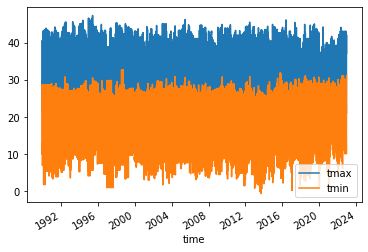

In [346]:
weather[["tmax","tmin"]].plot()

In [347]:
weather.index.year.value_counts().sort_index()

1990    363
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    206
Name: time, dtype: int64

<AxesSubplot:xlabel='time'>

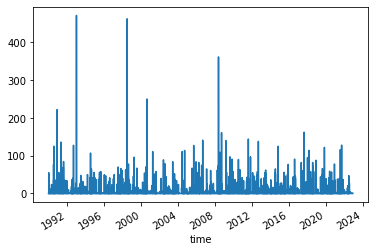

In [348]:
weather["prcp"].plot()

In [349]:
weather.groupby(weather.index.year).sum()["prcp"]

time
1990     917.5
1991     840.3
1992     555.3
1993     957.8
1994     778.7
1995     375.6
1996     476.4
1997     777.1
1998    1206.4
1999     591.3
2000    1105.2
2001     659.6
2002     571.0
2003     731.6
2004     667.0
2005     623.1
2006     709.2
2007     537.6
2008    1776.5
2009     905.1
2010     759.4
2011     856.5
2012     868.9
2013     813.7
2014     708.3
2015     577.0
2016     754.8
2017     804.5
2018    1164.6
2019     953.5
2020     923.9
2021     867.7
2022     228.6
Name: prcp, dtype: float64

In [350]:
weather["target"]=weather.shift(-1)["tmax"]

In [351]:
weather

,tavg,tmin,tmax,prcp,target
time,,,,,
1990-03-01,10.2,1.8,18.6,0.0,19.3
1990-04-01,9.1,1.8,19.3,0.0,23.8
1990-05-01,13.5,1.8,23.8,0.0,21.4
1990-06-01,11.5,5.9,21.4,0.0,23.6
1990-07-01,14.2,5.4,23.6,0.0,24.6
...,...,...,...,...,...
2022-07-21,27.4,25.1,33.1,27.3,31.1
2022-07-22,28.1,26.1,31.1,16.0,34.7
2022-07-23,30.3,26.2,34.7,11.9,34.7


In [352]:
weather=weather.iloc[:-1,:].copy()
or_weather=weather.copy()

In [353]:
weather

,tavg,tmin,tmax,prcp,target
time,,,,,
1990-03-01,10.2,1.8,18.6,0.0,19.3
1990-04-01,9.1,1.8,19.3,0.0,23.8
1990-05-01,13.5,1.8,23.8,0.0,21.4
1990-06-01,11.5,5.9,21.4,0.0,23.6
1990-07-01,14.2,5.4,23.6,0.0,24.6
...,...,...,...,...,...
2022-07-20,28.6,25.1,33.1,17.7,33.1
2022-07-21,27.4,25.1,33.1,27.3,31.1
2022-07-22,28.1,26.1,31.1,16.0,34.7


### Ridge Model

In [354]:
predictors=["prcp","tmax","tmin"]
train=weather.loc[:"2020-12-31"]
test=weather.loc["2021-01-01":]

In [355]:
from sklearn.linear_model import Ridge
reg=Ridge(alpha=.1)
reg.fit(train[predictors], train["target"])
predictions=reg.predict(test[predictors])

In [356]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test["target"], predictions)

1.3789511889989914

In [357]:
combined= pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns=["actual", "pred"]

In [358]:
combined

,actual,pred
time,,
2021-01-01,23.5,20.260692
2021-02-01,24.7,23.666650
2021-03-01,25.2,24.960709
2021-04-01,26.3,25.535591
2021-05-01,28.1,26.579049
...,...,...
2022-07-20,33.1,33.275504
2022-07-21,31.1,33.263213
2022-07-22,34.7,31.442134


<AxesSubplot:xlabel='time'>

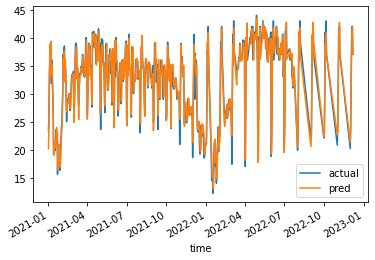

In [359]:
combined.plot()

In [360]:
reg.coef_

array([-0.00128036,  0.93561876,  0.03569103])

The error in Ridge model is approx 1.379 and precipitation have negative effect while tmax have maximum affect

Trying to increase predictors in order to decrease error further

In [361]:
def create_predictions(predictors, weather, reg):
    train=weather.loc[:"2020-12-31"]
    test=weather.loc["2021-01-01":]
    reg.fit(train[predictors], train["target"])
    predictions=reg.predict(test[predictors])
    error=mean_absolute_error(test["target"], predictions)
    combined= pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns=["actual", "pred"]
    return error,combined

In [362]:
weather["month_max"]= weather["tmax"].rolling(30).mean()

In [363]:
weather

,tavg,tmin,tmax,prcp,target,month_max
time,,,,,,
1990-03-01,10.2,1.8,18.6,0.0,19.3,NaN
1990-04-01,9.1,1.8,19.3,0.0,23.8,NaN
1990-05-01,13.5,1.8,23.8,0.0,21.4,NaN
1990-06-01,11.5,5.9,21.4,0.0,23.6,NaN
1990-07-01,14.2,5.4,23.6,0.0,24.6,NaN
...,...,...,...,...,...,...
2022-07-20,28.6,25.1,33.1,17.7,33.1,37.110000
2022-07-21,27.4,25.1,33.1,27.3,31.1,37.010000
2022-07-22,28.1,26.1,31.1,16.0,34.7,36.776667


In [364]:
weather["month_day_max"]=weather["month_max"]/weather["tmax"]

In [365]:
weather["max_min"]=weather["tmax"]/weather["tmin"]

In [366]:
weather

,tavg,tmin,tmax,prcp,target,month_max,month_day_max,max_min
time,,,,,,,,
1990-03-01,10.2,1.8,18.6,0.0,19.3,NaN,NaN,10.333333
1990-04-01,9.1,1.8,19.3,0.0,23.8,NaN,NaN,10.722222
1990-05-01,13.5,1.8,23.8,0.0,21.4,NaN,NaN,13.222222
1990-06-01,11.5,5.9,21.4,0.0,23.6,NaN,NaN,3.627119
1990-07-01,14.2,5.4,23.6,0.0,24.6,NaN,NaN,4.370370
...,...,...,...,...,...,...,...,...
2022-07-20,28.6,25.1,33.1,17.7,33.1,37.110000,1.121148,1.318725
2022-07-21,27.4,25.1,33.1,27.3,31.1,37.010000,1.118127,1.318725
2022-07-22,28.1,26.1,31.1,16.0,34.7,36.776667,1.182529,1.191571


In [367]:
weather=weather.dropna()

In [368]:
predictors=["tavg","prcp","tmax","tmin","month_max","month_day_max","max_min"]

In [369]:
error, combined= create_predictions(predictors, weather, reg)

In [370]:
error

1.3174894801108292

<AxesSubplot:xlabel='time'>

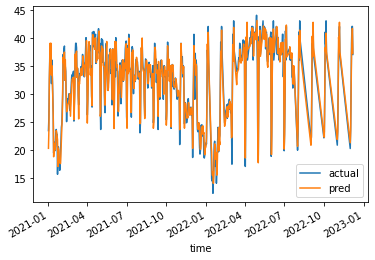

In [371]:
combined.plot()

## Trying Other Regression Models on the Preprocessed Dataset

In [458]:
or_weather

,tavg,tmin,tmax,prcp,target
time,,,,,
1990-03-01,10.2,1.8,18.6,0.0,19.3
1990-04-01,9.1,1.8,19.3,0.0,23.8
1990-05-01,13.5,1.8,23.8,0.0,21.4
1990-06-01,11.5,5.9,21.4,0.0,23.6
1990-07-01,14.2,5.4,23.6,0.0,24.6
...,...,...,...,...,...
2022-07-20,28.6,25.1,33.1,17.7,33.1
2022-07-21,27.4,25.1,33.1,27.3,31.1
2022-07-22,28.1,26.1,31.1,16.0,34.7


In [459]:
def diff_models(predictors, weather, reg, predictions):
    train=or_weather.loc[:"2020-12-31"]
    test=or_weather.loc["2021-01-01":]
    error=mean_absolute_error(test["target"], predictions)
    combined= pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns=["actual", "pred"]
    return error,combined

In [460]:
train=or_weather.loc[:"2020-12-31"]
test=or_weather.loc["2021-01-01":]

In [461]:
predictors=["prcp","tmax","tmin"]

### Linear Regression Model

In [462]:
from sklearn.linear_model import LinearRegression
regl=LinearRegression()
regl.fit(train[predictors], train["target"])
predictionsl=regl.predict(test[predictors])

In [463]:
errorl, combinedl= diff_models(predictors, or_weather, regl, predictionsl)

In [464]:
regl.coef_

array([-0.00128033,  0.93561943,  0.03569056])

In [465]:
errorl

1.3789512887593258

<AxesSubplot:xlabel='time'>

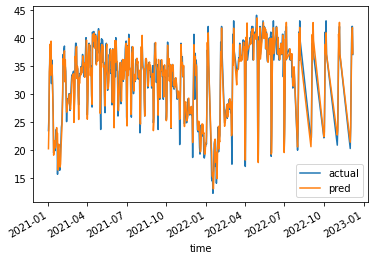

In [466]:
combinedl.plot()

### Polynomial Regression Model

In [467]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg= PolynomialFeatures(degree=4)
X_poly= poly_reg.fit_transform(train[predictors])

regp=LinearRegression()
regp.fit(X_poly, train["target"])
predictionsp=regp.predict(poly_reg.transform(test[predictors]))

In [468]:
errorp, combinedp= diff_models(predictors, or_weather, regp, predictionsp)

In [469]:
regp.coef_

array([ 3.50100056e-09,  5.27106792e-01,  5.56000184e-01,  2.41484917e-01,
       -3.00638438e-03,  3.34629815e-02, -1.19230033e-01,  5.41350645e-02,
       -2.15437830e-01,  2.08627659e-01,  2.49237486e-06, -5.42856669e-05,
        2.34080196e-04, -5.07234916e-03,  1.16099983e-02, -2.54850343e-03,
       -2.93443633e-03,  1.48101073e-02, -1.84952685e-02,  4.61505832e-03,
        8.70223782e-10, -1.59711469e-07,  6.63228440e-08,  1.39244113e-05,
       -3.13283171e-05,  1.58215838e-05,  1.15193218e-04, -3.24614162e-04,
        2.54443623e-04, -1.07286529e-04,  4.53348563e-05, -2.51357996e-04,
        3.76265312e-04, -1.76474853e-04,  2.81092488e-05])

In [470]:
errorp

1.3816696088226086

<AxesSubplot:xlabel='time'>

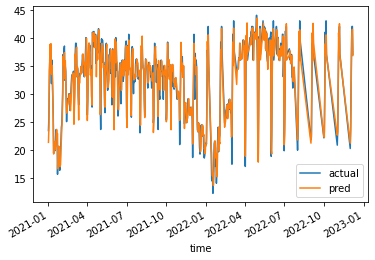

In [471]:
combinedp.plot()

### SVR Regression Model

In [472]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
sc_Y=StandardScaler()

y = np.array(train["target"]).reshape(len(train["target"]),1)

X_train= sc_X.fit_transform(train[predictors])
Y_train= sc_Y.fit_transform(y)

from sklearn.svm import SVR
regs=SVR(kernel='rbf')
regs.fit(X_train, Y_train)
predictionss = sc_Y.inverse_transform(regs.predict(sc_X.transform(test[predictors])).reshape(-1,1))

C:\Users\Garima Ranjan\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [473]:
from sklearn.utils.validation import column_or_1d
predictionss=column_or_1d(predictionss, warn=True)
predictionss

C:\Users\Garima Ranjan\AppData\Local\Temp\ipykernel_56104\356419259.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  predictionss=column_or_1d(predictionss, warn=True)


array([21.16119827, 23.85810151, 24.94179086, 25.6139321 , 26.64231031,
       28.11471806, 29.07509865, 26.12634199, 23.49612818, 25.4076116 ,
       25.54333569, 21.46180875, 19.15897323, 19.99405716, 21.61355103,
       21.88431344, 20.32592812, 21.1567145 , 23.45190944, 24.03351423,
       23.19045473, 23.23588718, 16.53329019, 20.34080023, 21.03280403,
       17.93038506, 18.13926775, 16.7671251 , 17.39411672, 20.39084192,
       22.23062679, 24.38739878, 25.9234064 , 27.25114631, 28.58867386,
       27.90266729, 24.01242584, 24.38220528, 24.74380568, 25.01802532,
       25.9328466 , 27.12507198, 26.27711043, 27.12507198, 28.12576789,
       28.24464404, 29.17163097, 29.05431346, 29.87799783, 30.05638127,
       28.17479675, 27.25646058, 28.54794293, 30.48739657, 32.12443775,
       33.35761748, 33.55301895, 33.34500718, 33.76612077, 34.17214912,
       32.0284794 , 30.0815436 , 32.34598163, 32.95764667, 32.52407348,
       33.17058139, 33.76108557, 33.8128679 , 34.37700317, 34.58

In [474]:
errors=mean_absolute_error(test["target"], predictionss)
combineds= pd.concat([test["target"], pd.Series(predictionss, index=test.index)], axis=1)
combineds.columns=["actual", "pred"]

In [475]:
errors

1.3560073089438582

<AxesSubplot:xlabel='time'>

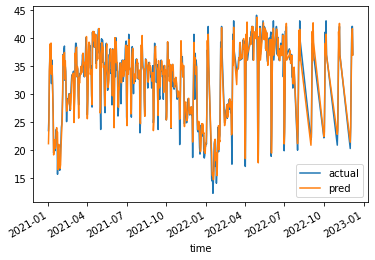

In [476]:
combineds.plot()

### Decision Tree Regression Model

In [477]:
from sklearn.tree import DecisionTreeRegressor
regd=DecisionTreeRegressor(random_state=0)
regd.fit(train[predictors], train["target"])
predictionsd=regd.predict(test[predictors])

In [478]:
errord, combinedd= diff_models(predictors, or_weather, regd,predictionsd)

In [479]:
errord

1.7581223893065998

<AxesSubplot:xlabel='time'>

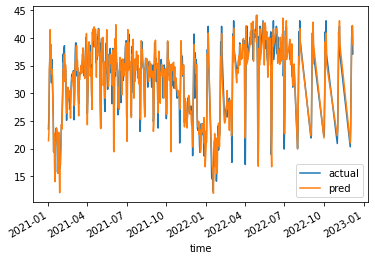

In [480]:
combinedd.plot()

### Random Forest Regression Model

In [481]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(n_estimators=10, random_state=0)
regr.fit(train[predictors], train["target"])
predictionsr=regr.predict(test[predictors])

In [482]:
errorr, combinedr= diff_models(predictors, or_weather, regr, predictionsr)

In [483]:
errorr

1.5390142614895714

<AxesSubplot:xlabel='time'>

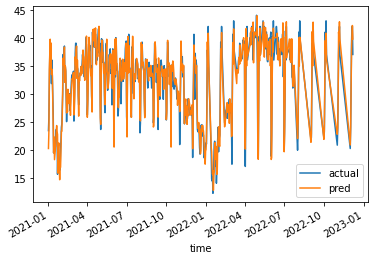

In [484]:
combinedr.plot()

#### We observe that SVR has the least error of all

In [485]:
combineds

,actual,pred
time,,
2021-01-01,23.5,21.161198
2021-02-01,24.7,23.858102
2021-03-01,25.2,24.941791
2021-04-01,26.3,25.613932
2021-05-01,28.1,26.642310
...,...,...
2022-07-20,33.1,33.175080
2022-07-21,31.1,32.958114
2022-07-22,34.7,31.836562


### Trying to improve further on SVR by adding more predictors : Trying SVR on "weather"

In [486]:
weather

,tavg,tmin,tmax,prcp,target,month_max,month_day_max,max_min
time,,,,,,,,
1990-01-02,17.5,10.0,27.7,0.0,27.7,25.736667,0.929122,2.770000
1990-02-02,15.2,10.0,27.7,0.0,27.7,26.040000,0.940072,2.770000
1990-03-02,15.2,10.0,27.7,0.0,24.6,26.320000,0.950181,2.770000
1990-04-02,17.4,10.0,24.6,0.0,24.6,26.346667,1.071003,2.460000
1990-05-02,16.2,9.2,24.6,23.9,24.6,26.453333,1.075339,2.673913
...,...,...,...,...,...,...,...,...
2022-07-20,28.6,25.1,33.1,17.7,33.1,37.110000,1.121148,1.318725
2022-07-21,27.4,25.1,33.1,27.3,31.1,37.010000,1.118127,1.318725
2022-07-22,28.1,26.1,31.1,16.0,34.7,36.776667,1.182529,1.191571


In [487]:
train=weather.loc[:"2020-12-31"]
test=weather.loc["2021-01-01":]

In [488]:
train

,tavg,tmin,tmax,prcp,target,month_max,month_day_max,max_min
time,,,,,,,,
1990-01-02,17.5,10.0,27.7,0.0,27.7,25.736667,0.929122,2.770000
1990-02-02,15.2,10.0,27.7,0.0,27.7,26.040000,0.940072,2.770000
1990-03-02,15.2,10.0,27.7,0.0,24.6,26.320000,0.950181,2.770000
1990-04-02,17.4,10.0,24.6,0.0,24.6,26.346667,1.071003,2.460000
1990-05-02,16.2,9.2,24.6,23.9,24.6,26.453333,1.075339,2.673913
...,...,...,...,...,...,...,...,...
2020-12-27,14.3,6.0,23.3,0.0,22.9,24.746667,1.062089,3.883333
2020-12-28,15.2,10.1,22.9,0.0,22.5,24.573333,1.073071,2.267327
2020-12-29,13.9,8.5,22.5,0.0,22.3,24.403333,1.084593,2.647059


In [489]:
predictors=["tavg","prcp","tmax","tmin","month_max","month_day_max","max_min"]

In [490]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
sc_Y=StandardScaler()

y = np.array(train["target"]).reshape(len(train["target"]),1)

X_train= sc_X.fit_transform(train[predictors])
Y_train= sc_Y.fit_transform(y)

from sklearn.svm import SVR
regs=SVR(kernel='rbf')
regs.fit(X_train, Y_train)
predictions = sc_Y.inverse_transform(regs.predict(sc_X.transform(test[predictors])).reshape(-1,1))

C:\Users\Garima Ranjan\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [491]:
from sklearn.utils.validation import column_or_1d
prediction=column_or_1d(predictionss, warn=True)
prediction

array([21.16119827, 23.85810151, 24.94179086, 25.6139321 , 26.64231031,
       28.11471806, 29.07509865, 26.12634199, 23.49612818, 25.4076116 ,
       25.54333569, 21.46180875, 19.15897323, 19.99405716, 21.61355103,
       21.88431344, 20.32592812, 21.1567145 , 23.45190944, 24.03351423,
       23.19045473, 23.23588718, 16.53329019, 20.34080023, 21.03280403,
       17.93038506, 18.13926775, 16.7671251 , 17.39411672, 20.39084192,
       22.23062679, 24.38739878, 25.9234064 , 27.25114631, 28.58867386,
       27.90266729, 24.01242584, 24.38220528, 24.74380568, 25.01802532,
       25.9328466 , 27.12507198, 26.27711043, 27.12507198, 28.12576789,
       28.24464404, 29.17163097, 29.05431346, 29.87799783, 30.05638127,
       28.17479675, 27.25646058, 28.54794293, 30.48739657, 32.12443775,
       33.35761748, 33.55301895, 33.34500718, 33.76612077, 34.17214912,
       32.0284794 , 30.0815436 , 32.34598163, 32.95764667, 32.52407348,
       33.17058139, 33.76108557, 33.8128679 , 34.37700317, 34.58

In [494]:
errors_new=mean_absolute_error(test["target"], prediction)
combineds_new= pd.concat([test["target"], pd.Series(prediction, index=test.index)], axis=1)
combineds_new.columns=["actual", "pred"]

In [495]:
errors_new

1.3560073089438582

In [496]:
combineds_new

,actual,pred
time,,
2021-01-01,23.5,21.161198
2021-02-01,24.7,23.858102
2021-03-01,25.2,24.941791
2021-04-01,26.3,25.613932
2021-05-01,28.1,26.642310
...,...,...
2022-07-20,33.1,33.175080
2022-07-21,31.1,32.958114
2022-07-22,34.7,31.836562


## Ridge is the best Model